In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ex3

## Task 1

In [2]:
x0 = np.array([3, -2, -30])

In [3]:
u1 = np.array([10, -20, 10])
u2 = np.array([3, 20, -30])

In [4]:
x1 = ex3.pose_from_odometry(u1, x0)
x2 = ex3.pose_from_odometry(u2, x1)

In [5]:
print('Position x0: ', x0)
print('Position x1: ', x1)
print('Position x2: ', x2)

Position x0:  [  3  -2 -30]
Position x1:  [  9.4278761   -9.66044443 -40.        ]
Position x2:  [ 12.24695396 -10.68650486 -50.        ]


## Task 2

#### In this task, we have to see effect of different odometry measurement errors, so there are 8 possible combinations of errors, according to the homework task explanation

In [6]:
error = [0.5, 10, 5]

In [7]:
error_combinations = np.array([list(map(int, list('{0:03b}'.format(i)))) for i in range(8)])
for i in range(0, len(error_combinations)):
    for j in range(0,3):
        if error_combinations[i,j] == 0:
            error_combinations[i,j] = -1

In [8]:
poses = ex3.generate_spread(x0, u1, error, error_combinations)

In [9]:
poses

array([[  7.75      , -10.22724134, -55.        ],
       [  7.75      , -10.22724134, -45.        ],
       [ 10.27742221,  -8.10648229, -35.        ],
       [ 10.27742221,  -8.10648229, -25.        ],
       [  8.25      , -11.09326674, -55.        ],
       [  8.25      , -11.09326674, -45.        ],
       [ 11.04346665,  -8.7492699 , -35.        ],
       [ 11.04346665,  -8.7492699 , -25.        ]])

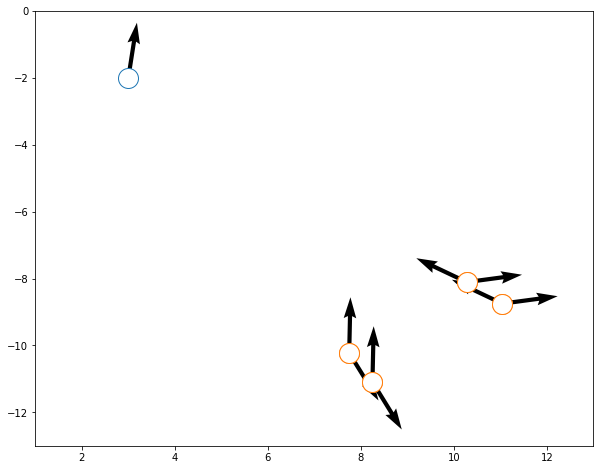

In [10]:
# Plot the poses with an arrow marker and a large hallow circle marker 
plt.figure(figsize=(10,8))
plt.ylim(-13, 0)
plt.xlim(1, 13)
plt.plot(x0[0], x0[1], 'o', markerfacecolor='w', markersize=20)
plt.quiver(x0[0], x0[1], np.cos(x0[2]), np.sin(x0[2]), scale=10)
plt.plot(poses[:,0], poses[:,1], 'o', markerfacecolor='w', markersize=20)
plt.quiver(poses[:,0], poses[:,1], np.cos(poses[:,2]), np.sin(poses[:,2]), scale=10)
plt.show()

#### Comment:
There are 4 pairs with common position, but different headings (which can be seen in the figure below). Blue point is starting pose.

## Task 3

### Task 3.1 - Motion 1

In [11]:
poses1 = ex3.generate_spread(x0, u1, error, error_combinations)
poses1_marg = ex3.marginalize_orientation(poses1)

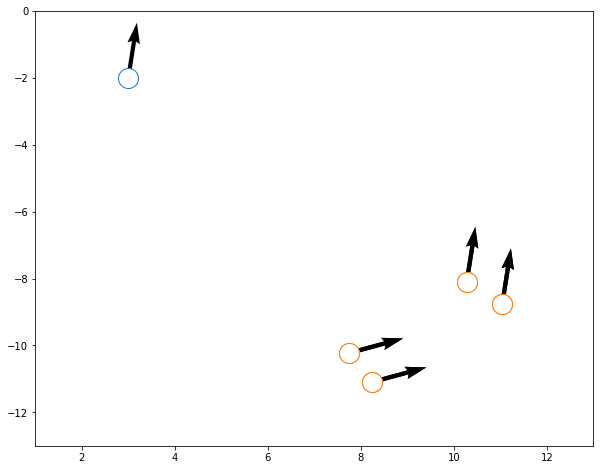

In [12]:
# Plot the poses with an arrow marker and a large hallow circle marker 
plt.figure(figsize=(10,8))
plt.ylim(-13, 0)
plt.xlim(1, 13)
plt.plot(x0[0], x0[1], 'o', markerfacecolor='w', markersize=20)
plt.quiver(x0[0], x0[1], np.cos(x0[2]), np.sin(x0[2]), scale=10)
plt.plot(poses1_marg[:,0], poses1_marg[:,1], 'o', markerfacecolor='w', markersize=20)
plt.quiver(poses1_marg[:,0], poses1_marg[:,1], np.cos(poses1_marg[:,2]), np.sin(poses1_marg[:,2]), scale=10)
plt.show()

#### Note: 
Heading direction $\theta$ has been marginalized. This means, all particles that had same position but different orientation, now have same orientation (which is mean of all orientations from those particles). Same stands for tasks below. This marginalization only applies for visualization (all calculations are being done with original particles).

### Task 3.2 - Motion 1 followed by Motion 2

In [13]:
poses2 = np.zeros((len(poses1) * len(error_combinations), 3))

In [14]:
for i in range(0, len(poses1)):
    pose2 = ex3.generate_spread(poses1[i], u2, error, error_combinations)
    poses2[len(error_combinations) * i : (len(error_combinations) * i) + len(error_combinations)] = pose2

In [15]:
poses2_marg = ex3.marginalize_orientation(poses2)

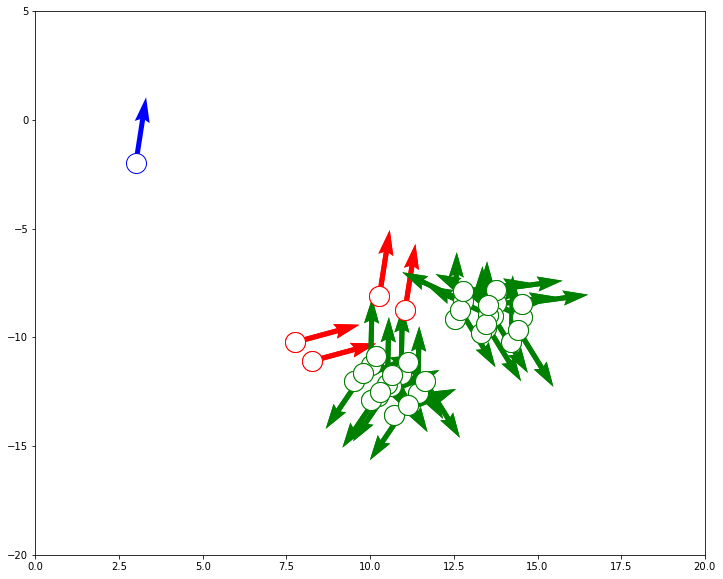

In [16]:
# Plot the poses with an arrow marker and a large hallow circle marker 
plt.figure(figsize=(12,10))

plt.xlim(0,20)
plt.ylim(-20,5)

plt.plot(x0[0], x0[1], 'o', markersize=20,  markerfacecolor='w', markeredgecolor='b')
plt.quiver(x0[0], x0[1], np.cos(x0[2]), np.sin(x0[2]), scale=10, color='b')

plt.plot(poses1_marg[:,0], poses1_marg[:,1], 'o', markersize=20, markerfacecolor='w', markeredgecolor='r')
plt.quiver(poses1_marg[:,0], poses1_marg[:,1], np.cos(poses1_marg[:,2]), np.sin(poses1_marg[:,2]), scale=10, color='r')

plt.plot(poses2_marg[:,0], poses2_marg[:,1], 'o', markersize=20, markerfacecolor='w', markeredgecolor='g')
plt.quiver(poses2_marg[:,0], poses2_marg[:,1], np.cos(poses2_marg[:,2]), np.sin(poses2_marg[:,2]), scale=10, color='g')

plt.show()

### Task 3.3 - Motion 1 followed by Motion 2 followed by Motion 3

In [17]:
poses3 = np.zeros((len(poses2) * len(error_combinations), 3))

In [18]:
for i in range(0, len(poses2)):
    pose3 = ex3.generate_spread(poses2[i], u1, error, error_combinations)
    poses3[len(error_combinations) * i: (len(error_combinations) * i) + len(error_combinations)] = pose3

In [19]:
poses3_marg = ex3.marginalize_orientation(poses3)

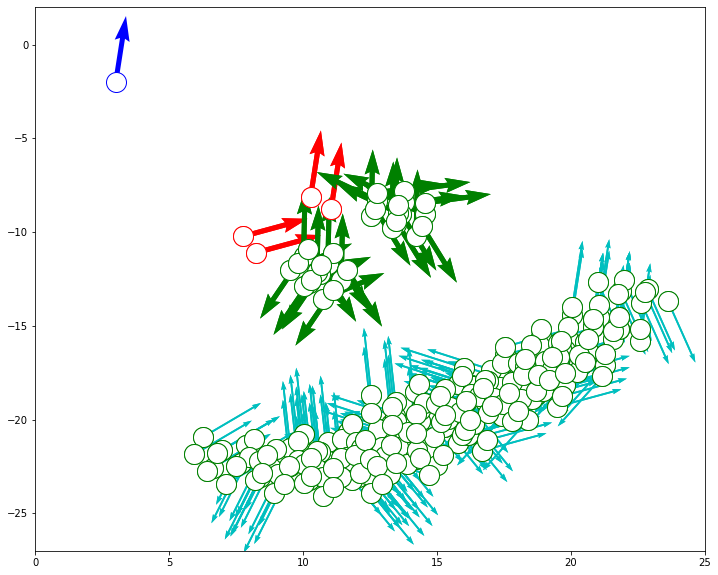

In [20]:
# Plot the poses with an arrow marker and a large hallow circle marker 
plt.figure(figsize=(12,10))

plt.xlim(0,25)
plt.ylim(-27,2)

plt.plot(x0[0], x0[1], 'o', markersize=20,  markerfacecolor='w', markeredgecolor='b')
plt.quiver(x0[0], x0[1], np.cos(x0[2]), np.sin(x0[2]), scale=10, color='b')

plt.plot(poses1_marg[:,0], poses1_marg[:,1], 'o', markersize=20, markerfacecolor='w', markeredgecolor='r')
plt.quiver(poses1_marg[:,0], poses1_marg[:,1], np.cos(poses1_marg[:,2]), np.sin(poses1_marg[:,2]), scale=10, color='r')

plt.plot(poses2_marg[:,0], poses2_marg[:,1], 'o', markersize=20, markerfacecolor='w', markeredgecolor='g')
plt.quiver(poses2_marg[:,0], poses2_marg[:,1], np.cos(poses2_marg[:,2]), np.sin(poses2_marg[:,2]), scale=10, color='g')

plt.plot(poses3_marg[:,0], poses3_marg[:,1], 'o', markersize=20, markerfacecolor='w', markeredgecolor='g')
plt.quiver(poses3_marg[:,0], poses3_marg[:,1], np.cos(poses3_marg[:,2]), np.sin(poses3_marg[:,2]), scale=10, color='c')

plt.show()

## Task 4

In [21]:
num_samples = 100

In [22]:
combination_indices = np.array([0, 1, 2, 3, 4, 5, 6, 7])

In [23]:
samples_1 = np.ones((num_samples,3)) * np.array([3.0, -2.0, -30])

In [24]:
sampled_motion_1 = error_combinations[np.random.choice(combination_indices, num_samples, replace=True)]

In [25]:
samples_2 = ex3.poses_from_odometries(error, sampled_motion_1, samples_1, u1)
samples_2_marg = ex3.marginalize_orientation(samples_2)

In [26]:
sampled_motion_2 = error_combinations[np.random.choice(combination_indices, num_samples, replace=True)]

In [27]:
samples_3 = ex3.poses_from_odometries(error, sampled_motion_2, samples_2, u2)
samples_3_marg = ex3.marginalize_orientation(samples_3)

In [28]:
sampled_motion_3 = error_combinations[np.random.choice(combination_indices, num_samples, replace=True)]

In [29]:
samples_4 = ex3.poses_from_odometries(error, sampled_motion_3, samples_3, u1)
samples_4_marg = ex3.marginalize_orientation(samples_4)

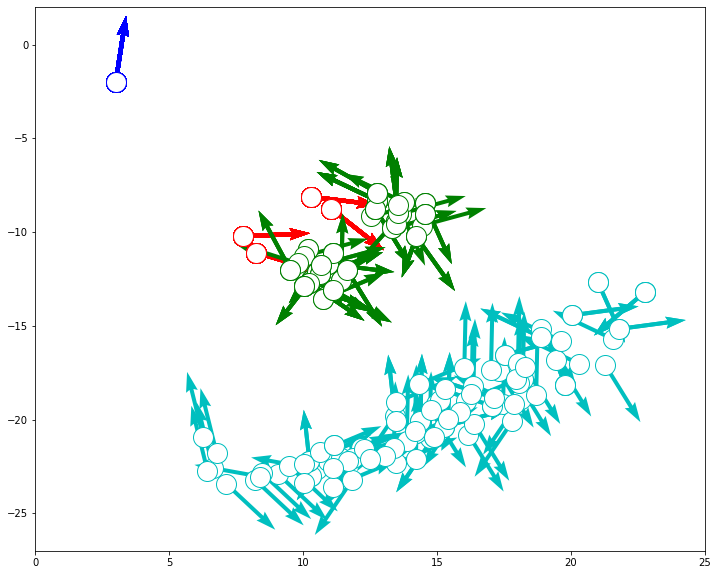

In [30]:
# Plot the poses with an arrow marker and a large hallow circle marker 
plt.figure(figsize=(12,10))

plt.xlim(0,25)
plt.ylim(-27,2)

plt.plot(samples_1[:,0], samples_1[:,1], 'o', markersize=20,  markerfacecolor='w', markeredgecolor='b')
plt.quiver(samples_1[:,0], samples_1[:,1], np.cos(samples_1[:,2]), np.sin(samples_1[:,2]), scale=10, color='b')

plt.plot(samples_2_marg[:,0], samples_2_marg[:,1], 'o', markersize=20, markerfacecolor='w', markeredgecolor='r')
plt.quiver(samples_2_marg[:,0], samples_2_marg[:,1], np.cos(samples_2_marg[:,2]), np.sin(samples_2_marg[:,2]), scale=10, color='r')

plt.plot(samples_3_marg[:,0], samples_3_marg[:,1], 'o', markersize=20, markerfacecolor='w', markeredgecolor='g')
plt.quiver(samples_3_marg[:,0], samples_3_marg[:,1], np.cos(samples_3_marg[:,2]), np.sin(samples_3_marg[:,2]), scale=10, color='g')

plt.plot(samples_4_marg[:,0], samples_4_marg[:,1], 'o', markersize=20, markerfacecolor='w', markeredgecolor='c')
plt.quiver(samples_4_marg[:,0], samples_4_marg[:,1], np.cos(samples_4_marg[:,2]), np.sin(samples_4_marg[:,2]), scale=10, color='c')

plt.show()